In [147]:
# Setting up the Python Environment
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [148]:
# Loading the data
df = pd.read_csv("./Lab_2_Data.csv")
display(df)

,Month,Sales,Profit,Transactions
0,24-Jan,10500,3000.0,450.0
1,24-Feb,11000,3500.0,480.0
2,24-Mar,12000,4000.0,520.0
3,24-Apr,13500,4500.0,560.0
4,24-May,14000,5000.0,590.0
5,24-Jun,15500,5800.0,620.0
6,24-Jul,16000,6200.0,650.0
7,24-Aug,17500,6800.0,700.0
8,24-Sep,18000,7000.0,720.0
9,24-Oct,19500,7800.0,750.0


In [149]:
# Preparing the data
# Removing Missing Values
df = df.dropna()

# Dropping the Month Column
df = df.drop(columns="Month")
display(df)

# Checking for datatype of the given data
df.info()


,Sales,Profit,Transactions
0,10500,3000.0,450.0
1,11000,3500.0,480.0
2,12000,4000.0,520.0
3,13500,4500.0,560.0
4,14000,5000.0,590.0
5,15500,5800.0,620.0
6,16000,6200.0,650.0
7,17500,6800.0,700.0
8,18000,7000.0,720.0
9,19500,7800.0,750.0


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         10 non-null     int64  
 1   Profit        10 non-null     float64
 2   Transactions  10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes


In [150]:
# Implementing The Model
# From relation y = mx + c, predict y (profit and transactions) based on x (sales)
x = df[['Sales']]
y_profit = df[['Profit']]
y_tr = df[['Transactions']]

In [151]:
# Train and test data split into 80-20
x_train_profit, x_test_profit, y_train_profit, y_test_profit = train_test_split(x, y_profit, test_size=0.2, random_state=42)
x_train_tr, x_test_tr, y_train_tr, y_test_tr = train_test_split(x, y_tr, test_size=0.2, random_state=42)

In [152]:
# Train the models
model_profit = LinearRegression()
model_profit.fit(x_train_profit, y_train_profit)

model_tr = LinearRegression()
model_tr.fit(x_train_tr, y_train_tr)

LinearRegression()

In [153]:
# Making Predictions
predicted_profit = model_profit.predict(x)
predicted_tr = model_tr.predict(x)

In [154]:
# Adding the predicted value to the dataset for visualization
df['Predicted Profit'] = predicted_profit
df['Predicted Transactions'] = predicted_tr

display(df)

,Sales,Profit,Transactions,Predicted Profit,Predicted Transactions
0,10500,3000.0,450.0,3084.054195,462.793121
1,11000,3500.0,480.0,3351.120375,479.280875
2,12000,4000.0,520.0,3885.252736,512.256384
3,13500,4500.0,560.0,4686.451277,561.719646
4,14000,5000.0,590.0,4953.517457,578.207400
5,15500,5800.0,620.0,5754.715998,627.670662
6,16000,6200.0,650.0,6021.782178,644.158416
7,17500,6800.0,700.0,6822.980719,693.621678
8,18000,7000.0,720.0,7090.046899,710.109432
9,19500,7800.0,750.0,7891.245440,759.572694


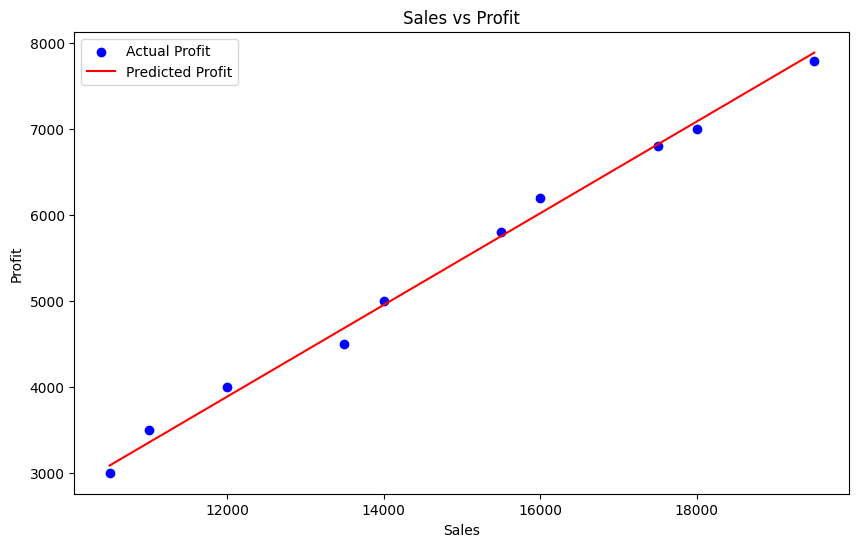

In [155]:
# Plotting in graph
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='blue', label='Actual Profit')
plt.plot(df['Sales'], predicted_profit, color='red', label='Predicted Profit')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.savefig("./sales_vs_profit.png")
plt.show()

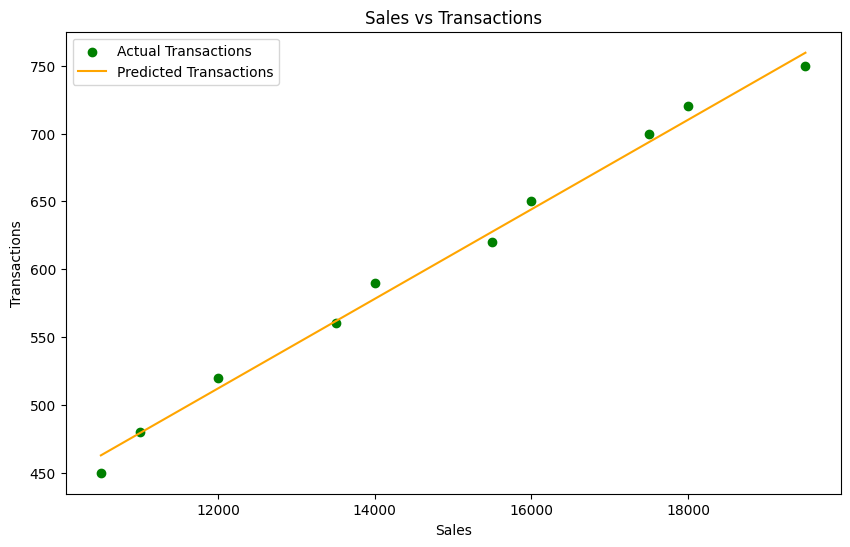

In [156]:
# Plot actual vs predicted Transactions
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Transactions'], color='green', label='Actual Transactions')
plt.plot(df['Sales'], predicted_tr, color='orange', label='Predicted Transactions')
plt.title('Sales vs Transactions')
plt.xlabel('Sales')
plt.ylabel('Transactions')
plt.legend()
plt.savefig("./sales_vs_Transactions.png")
plt.show()

In [157]:
# Saving the data into new csv
df.to_csv("./Predicted_Lab_2_Data.csv", index=False)